In [1]:
import statsmodels.api as sm

In [2]:
from pmdarima import auto_arima

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [4]:
file_path = r"C:\Users\sushm\OneDrive\Desktop\expense.xlsx"
data = pd.read_excel(file_path)

NameError: name 'pd' is not defined

In [5]:
import pandas as pd

In [6]:
file_path = r"C:\Users\sushm\OneDrive\Desktop\expense.xlsx"
data = pd.read_excel(file_path)

In [8]:
def remove_emoji(string):
    return emoji.replace_emoji(string, replace='')


In [12]:
data['Category'] = data['Category'].apply(remove_emoji)

In [10]:
import emoji

In [11]:
def remove_emoji(string):
    return emoji.replace_emoji(string, replace='')

In [13]:
data['Category'] = data['Category'].apply(remove_emoji)

In [14]:
data = data.drop(columns=['Subcategory', 'Description', 'Currency', 'Account'])

In [15]:
data['Date'] = pd.to_datetime(data['Date'])

C:\Users\sushm\AppData\Local\Temp\ipykernel_8852\1453708669.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


In [16]:
data.set_index('Date', inplace=True)

In [17]:
daily_expenses = data.resample('D').sum()

In [18]:
daily_expenses.index = pd.to_datetime(daily_expenses.index)

In [21]:
import matplotlib.pyplot as plt

In [26]:
print(daily_expenses.head())


Date
2024-06-01     190
2024-06-02      75
2024-06-03    1378
2024-06-04     319
2024-06-05       0
Freq: D, Name: Amount, dtype: int64


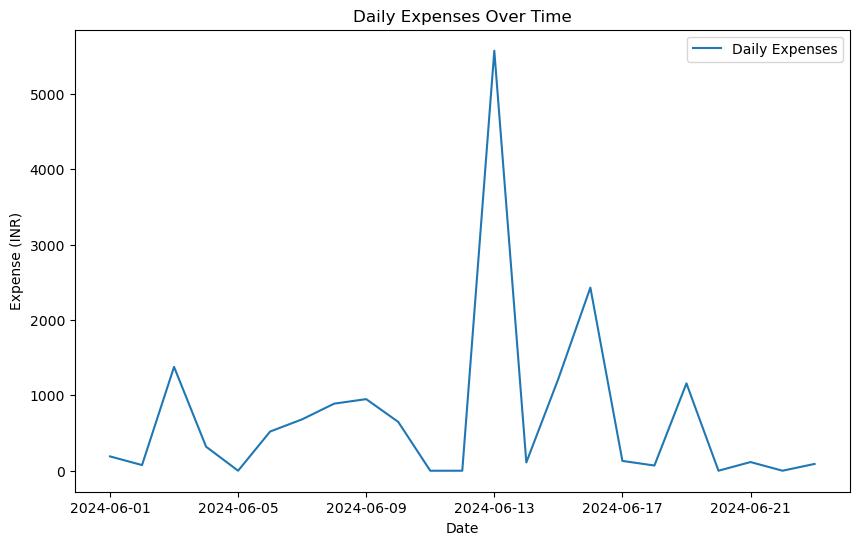

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(daily_expenses.index, daily_expenses.values, label='Daily Expenses')
plt.title('Daily Expenses Over Time')
plt.xlabel('Date')
plt.ylabel('Expense (INR)')
plt.legend()
plt.show()

In [29]:
result = adfuller(daily_expenses.dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -5.237566489595286
p-value: 7.365200623861768e-06


In [30]:
if result[1] > 0.05:
    daily_expenses = daily_expenses.diff().dropna()

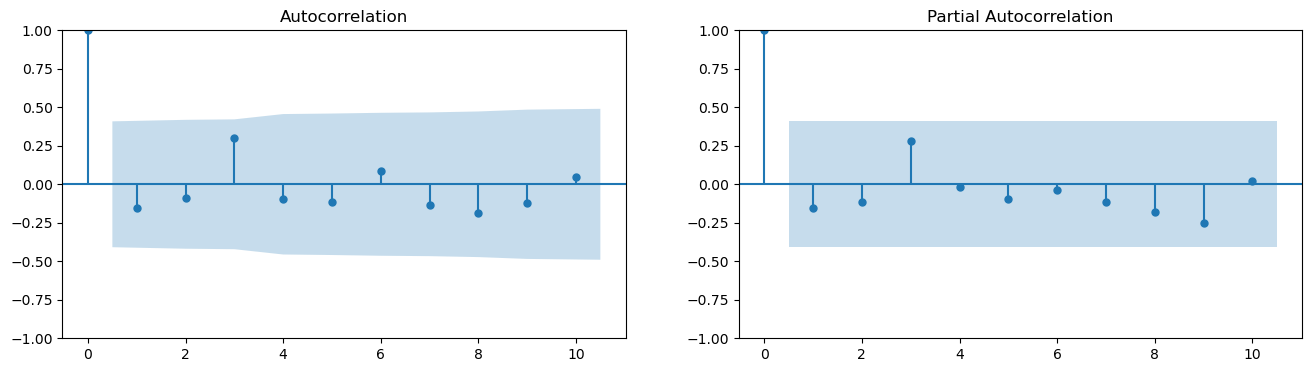

In [31]:
lags = min(10, len(daily_expenses) // 2 - 1)
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(daily_expenses, ax=axes[0], lags=lags)
plot_pacf(daily_expenses, ax=axes[1], lags=lags)
plt.show()

In [32]:
sarima_model = SARIMAX(daily_expenses, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit(disp=False)
print(sarima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                             Amount   No. Observations:                   23
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -85.359
Date:                            Sat, 20 Jul 2024   AIC                            180.718
Time:                                    17:27:23   BIC                            182.231
Sample:                                06-01-2024   HQIC                           179.058
                                     - 06-23-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3269      0.800     -0.408      0.683      -1.895       1.242
ma.L1         -0.7207      0.998   

C:\Users\sushm\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


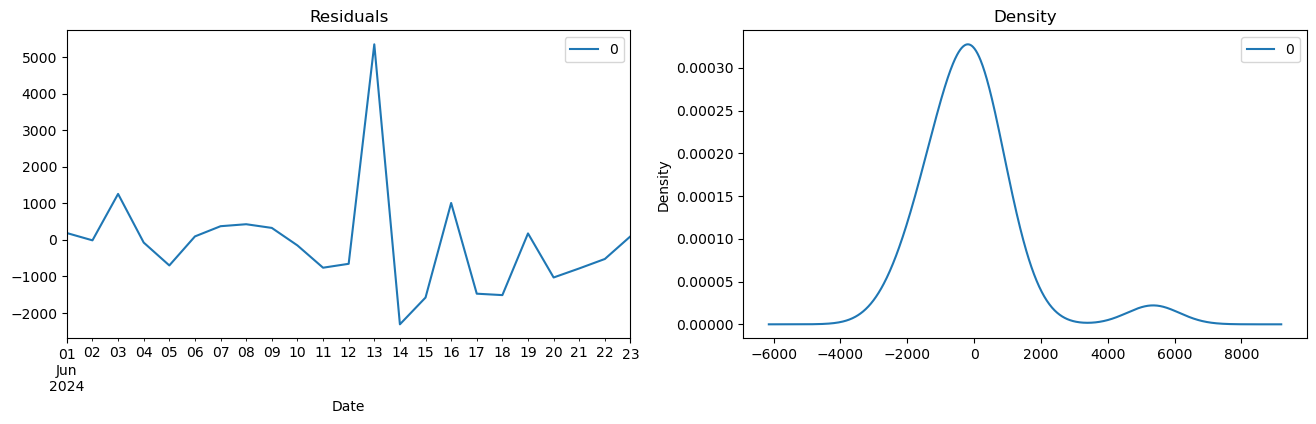

In [33]:
residuals = pd.DataFrame(sarima_result.resid)
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [34]:
n_periods = 30
forecast = sarima_result.get_forecast(steps=n_periods)
forecast_df = forecast.predicted_mean
conf_int = forecast.conf_int()


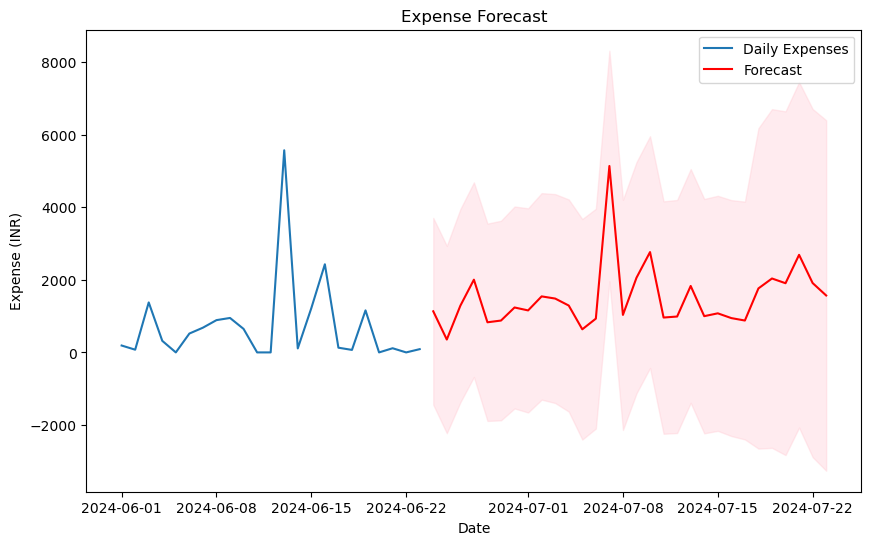

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(daily_expenses, label='Daily Expenses')
plt.plot(forecast_df, label='Forecast', color='red')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Expense Forecast')
plt.xlabel('Date')
plt.ylabel('Expense (INR)')
plt.legend()
plt.show()